Se recomienda ejecutar en Google Colab: https://colab.research.google.com/drive/1eQMQHKHWKI3S4iJ8WEJxQs6aVIuyBlmy?usp=sharing

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"

# 1. Preprocesamiento

Solo incluye la carga de los datos y su adecuación al modelo (el scraping y el proprocesado complejo puede verlo en los demás ficheros del proyecto)

In [1]:
from google.colab import files
uploaded = files.upload() # Cargar en Google Colab el dataset (fichero google_reviews_scraping_preprocess/ google_reviews_balanced.csv del proyecto)

Saving google_reviews_balanced.csv to google_reviews_balanced.csv


In [ ]:
X = pd.read_csv("google_reviews_balanced.csv", sep='|')
y = X.pop("class")

# 80%-10%-10% --> primero 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
# 10% * total = (90% * total) * x % --> x = 0.1111 = 11,11%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.111, random_state=42, stratify=y_train)

# 2. Definición del modelo y entrenamiento

In [ ]:
# Cambiar trainable a False si queremos que solo entrenen las ultimas capas
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=False)

In [ ]:
# Creacion del modelo
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64, activation="relu"))
# model.add(tf.keras.layers.Dropout(0.4)) 
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1)) # Unica neurona de salida, 0 negativo 1 positivo

model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
es_callback = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
# Entrenamiento
history = model.fit(
    X_train,
    y_train,      
    batch_size=32,
    epochs=50,                                  
    validation_data=(X_val,y_val), 
    callbacks=[es_callback],
    verbose=1                                  
)
results = model.evaluate(X_test,y_test, verbose=2)

Epoch 1/50
36/36 [==============================] - 1s 13ms/step - loss: 0.6604 - accuracy: 0.5079 - val_loss: 0.6215 - val_accuracy: 0.5486
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 0.5805 - accuracy: 0.6614 - val_loss: 0.5437 - val_accuracy: 0.7708
Epoch 3/50
36/36 [==============================] - 0s 5ms/step - loss: 0.4988 - accuracy: 0.7871 - val_loss: 0.4626 - val_accuracy: 0.7986
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 0.4234 - accuracy: 0.8194 - val_loss: 0.4000 - val_accuracy: 0.8264
Epoch 5/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.8360 - val_loss: 0.3760 - val_accuracy: 0.8542
Epoch 6/50
36/36 [==============================] - 0s 5ms/step - loss: 0.3532 - accuracy: 0.8386 - val_loss: 0.3665 - val_accuracy: 0.8472
Epoch 7/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3334 - accuracy: 0.8455 - val_loss: 0.3640 - val_accuracy: 0.8472
Epoch 8/50
36/36 [=

# 3. Representación

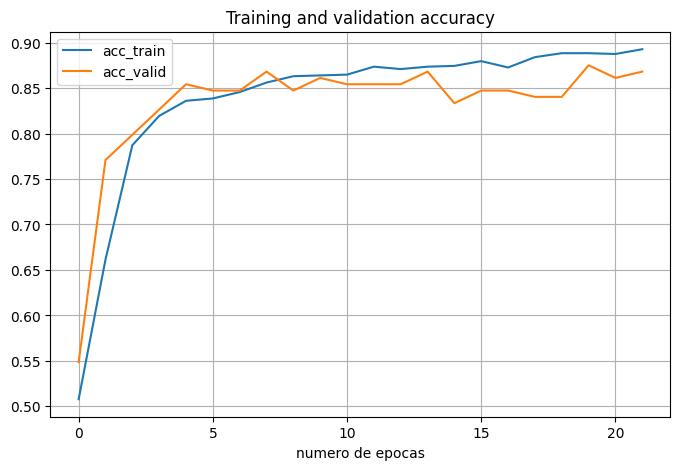

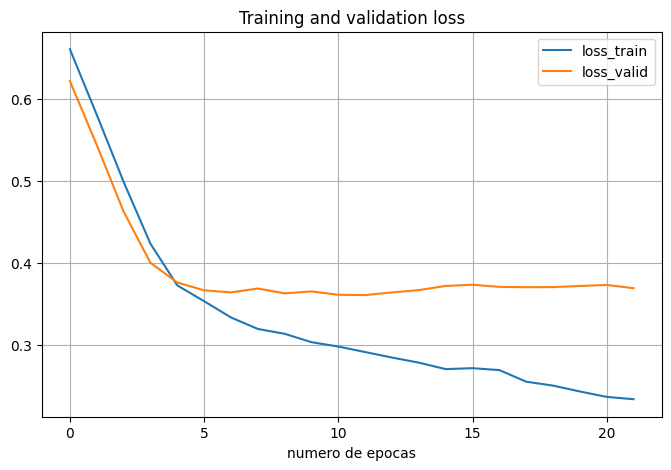

In [ ]:
pd.DataFrame({'acc_train': history.history['accuracy'],
              'acc_valid': history.history['val_accuracy']}).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('numero de epocas')
plt.title('Training and validation accuracy');

pd.DataFrame({'loss_train': history.history['loss'],
              'loss_valid': history.history['val_loss']}).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss');